##0. Load data

In [ ]:
!gdown --id 1kU64ckjel-CpAH352bwU5hWMFT_caZxZ

In [ ]:
!unzip 'card_fraud_detection.zip'

##1. Import library

In [ ]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore

from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore

##2. Read data

In [ ]:
file_path = 'creditcard.csv'
df = pd.read_csv(file_path)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data = df.to_numpy()
X = data[:, :-1]
y = data[:, -1]

In [ ]:
X, y

(array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
          1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
        [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
        [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
         -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
        ...,
        [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
          4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
        [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
          1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
        [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
         -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [ ]:
X = np.hstack((np.ones((X.shape[0], 1)), X))
X.shape

(284807, 31)

In [ ]:
X = X.astype(np.float64)
y = y.astype(np.uint8)

In [ ]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = X.shape[0]
y_encoded = np.zeros((n_samples, n_classes))
y_encoded[range(n_samples), y] = 1
y_encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

##3. Split train, val, test

In [ ]:
test_size = 0.125
val_size = 0.2
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

##4. Normalize

In [ ]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

##5. Define function

In [ ]:
def softmax(z):
  exp_z = np.exp(z)

  return exp_z / exp_z.sum(axis=1)[:, None]

In [ ]:
def predict(X, theta):
  y_hat = X @ theta
  return softmax(y_hat)

In [ ]:
def compute_loss(y_hat, y):
  N = y.size
  return (-1 / N) * np.sum(y* np.log(y_hat))

In [ ]:
def compute_gradient(X, y_hat, y):
  N = y.size
  return X.T @ (y_hat - y) / N

In [ ]:
def update_theta(theta, gradient, lr):
  return theta - lr * gradient

In [ ]:
def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta)
  acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()

  return acc

##6. Initialize hyperoparameter

In [ ]:
lr = 0.01
epochs = 30
batchs_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
    size = (n_features, n_classes)
)

##7. Training

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []
for epoch in range(epochs):
  train_batch_accs = []
  train_batch_losses = []
  val_batch_accs = []
  val_batch_losses = []
  for i in range(0, X_train.shape[0], batchs_size):
    X_i = X_train[i:i + batchs_size]
    y_i = y_train[i:i + batchs_size]

    y_hat = predict(X_i, theta)
    train_loss = compute_loss(y_hat, y_i)
    gradient = compute_gradient(X_i, y_hat, y_i)
    theta = update_theta(theta, gradient, lr)
    train_acc = compute_accuracy(X_i, y_i, theta)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_acc = compute_accuracy(X_val, y_val, theta)

    train_batch_accs.append(train_acc)
    train_batch_losses.append(train_loss)
    val_batch_accs.append(val_acc)
    val_batch_losses.append(val_loss)

  train_acc = sum(train_batch_accs) / len(train_batch_accs)
  train_loss = sum(train_batch_losses) / len(train_batch_losses)
  val_acc = sum(val_batch_accs) / len(val_batch_accs)
  val_loss = sum(val_batch_losses) / len(val_batch_losses)

  train_accs.append(train_acc)
  train_losses.append(train_loss)
  val_accs.append(val_acc)
  val_losses.append(val_loss)

  print(f"\nEPOCH {epoch + 1}:\tTraining loss: {train_loss:.3f}\tValidation loss: {val_loss:.3f}")



EPOCH 1:	Training loss: 0.300	Validation loss: 0.297

EPOCH 2:	Training loss: 0.176	Validation loss: 0.174

EPOCH 3:	Training loss: 0.115	Validation loss: 0.113

EPOCH 4:	Training loss: 0.081	Validation loss: 0.080

EPOCH 5:	Training loss: 0.062	Validation loss: 0.061

EPOCH 6:	Training loss: 0.049	Validation loss: 0.049

EPOCH 7:	Training loss: 0.041	Validation loss: 0.041

EPOCH 8:	Training loss: 0.035	Validation loss: 0.035

EPOCH 9:	Training loss: 0.031	Validation loss: 0.031

EPOCH 10:	Training loss: 0.028	Validation loss: 0.027

EPOCH 11:	Training loss: 0.025	Validation loss: 0.025

EPOCH 12:	Training loss: 0.023	Validation loss: 0.023

EPOCH 13:	Training loss: 0.021	Validation loss: 0.021

EPOCH 14:	Training loss: 0.020	Validation loss: 0.020

EPOCH 15:	Training loss: 0.019	Validation loss: 0.018

EPOCH 16:	Training loss: 0.017	Validation loss: 0.017

EPOCH 17:	Training loss: 0.017	Validation loss: 0.016

EPOCH 18:	Training loss: 0.016	Validation loss: 0.015

EPOCH 19:	Training

##8. Visualize loss and accuracy

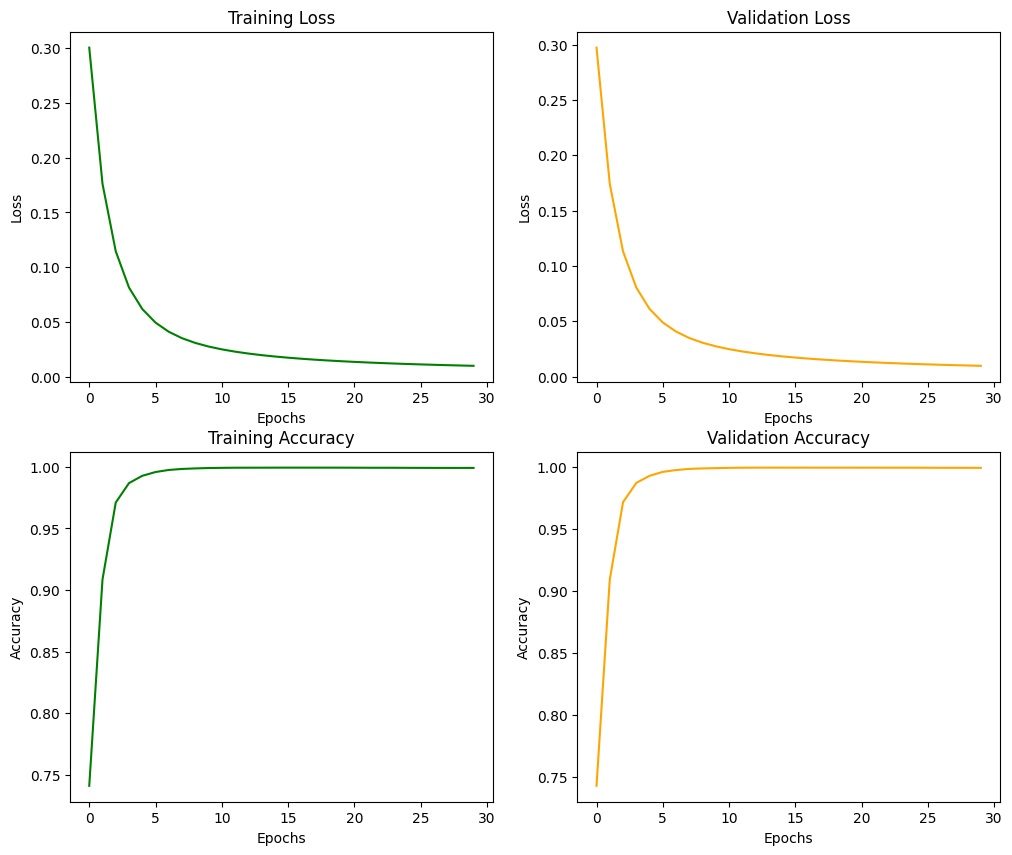

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses, 'green')
ax[0, 0].set(xlabel='Epochs', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epochs', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs, 'green')
ax[1, 0].set(xlabel='Epochs', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epochs', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

##9. Evaluate

In [ ]:
test_set_acc = compute_accuracy(X_test, y_test, theta)
val_set_acc = compute_accuracy(X_val, y_val, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy: {val_set_acc}')
print(f'Accuracy: {test_set_acc}')

Evaluation on validation and test set:
Accuracy: 0.9993153330290369
Accuracy: 0.9992275552122467
